In [1]:
!git clone https://github.com/deedGhost/HealthLearning

Cloning into 'HealthLearning'...
remote: Enumerating objects: 271, done.
remote: Counting objects: 100% (270/270), done.
remote: Compressing objects: 100% (182/182), done.
remote: Total 271 (delta 108), reused 216 (delta 73), pack-reused 1
Receiving objects: 100% (271/271), 8.34 MiB | 19.28 MiB/s, done.
Resolving deltas: 100% (108/108), done.


In [1]:
%cd HealthLearning

/content/HealthLearning


# 1. DATA EXPLORATION

# Load the dataset and preview

In [2]:
import pandas as pd
# Load the dataset
df = pd.read_csv("/content/HealthLearning/Cardiovascular Heart Disease/heart_data.csv")

# Display the first few rows
print(df.head())

   index  id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0      0   0  18393       2     168    62.0    110     80            1     1   
1      1   1  20228       1     156    85.0    140     90            3     1   
2      2   2  18857       1     165    64.0    130     70            3     1   
3      3   3  17623       2     169    82.0    150    100            1     1   
4      4   4  17474       1     156    56.0    100     60            1     1   

   smoke  alco  active  cardio  
0      0     0       1       0  
1      0     0       1       1  
2      0     0       0       1  
3      0     0       1       1  
4      0     0       0       0  


The overview of the dataset is as follows:
* Age: Age of the participant (integer).
* Gender: Gender of the participant (male/female).
* Height: Height measured in centimeters (integer).
* Weight: Weight measured in kilograms (integer).
* Ap_hi: Systolic blood pressure reading taken from the patient (integer).
* Ap_lo: Diastolic blood pressure reading taken from the patient (integer).
* Cholesterol: Total cholesterol level measured in mg/dL on a scale of 0 to 5+ units (integer).
* Gluc: Glucose level measured in mmol/L on a scale of 0 to 16+ units (integer).
* Smoke: Whether the person smokes or not (binary; 0=No, 1=Yes).
* Alco: Whether the person drinks alcohol or not (binary; 0=No, 1=Yes).
* Active: Whether the person is physically active or not (binary; 0=No, 1=Yes).
* Cardio: Whether the person suffers from cardiovascular diseases or not (binary; 0=No, 1=Yes).

# Features and Labels in the dataset

In [3]:
features = df.columns[:-1]  # Assuming the last column is the label
labels = df.columns[-1]      # Assuming the last column is the label
print("Features:", features)
print("Labels:", labels)

Features: Index(['index', 'id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active'],
      dtype='object')
Labels: cardio


In [4]:
# Explore size and shape
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 70000
Number of columns: 14


In [5]:
# Check for missing values & data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        70000 non-null  int64  
 1   id           70000 non-null  int64  
 2   age          70000 non-null  int64  
 3   gender       70000 non-null  int64  
 4   height       70000 non-null  int64  
 5   weight       70000 non-null  float64
 6   ap_hi        70000 non-null  int64  
 7   ap_lo        70000 non-null  int64  
 8   cholesterol  70000 non-null  int64  
 9   gluc         70000 non-null  int64  
 10  smoke        70000 non-null  int64  
 11  alco         70000 non-null  int64  
 12  active       70000 non-null  int64  
 13  cardio       70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


We can see that there are no null values in the dataset and we have one column of float datatype and rest are of integer type.

# Datatype Conversion

In [6]:
# Convert categorical columns to 'category' dtype
df['gender'] = df['gender'].astype('category')
df['smoke'] = df['smoke'].astype('category')
df['alco'] = df['alco'].astype('category')
df['active'] = df['active'].astype('category')
df['cardio'] = df['cardio'].astype('category')

In [7]:
# Converting the units of the age column from days to years
df['age'] = df['age'] / 365.25

# Calculate BMI
df["bmi"] = df["weight"] / ((df["height"] / 100) * (df["height"] / 100))

# Drop the "index" column
df = df.drop("index", axis=1)

# Drop the "id" column
df = df.drop("id", axis=1)

In [8]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.357290,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55.381246,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51.627652,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48.249144,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47.841205,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [9]:
df.tail()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
69995,52.676249,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,61.878166,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,52.199863,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,61.412731,1,163,72.0,135,80,1,2,0,0,0,1,27.099251
69999,56.235455,1,170,72.0,120,80,2,1,0,0,1,0,24.913495


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          70000 non-null  float64 
 1   gender       70000 non-null  category
 2   height       70000 non-null  int64   
 3   weight       70000 non-null  float64 
 4   ap_hi        70000 non-null  int64   
 5   ap_lo        70000 non-null  int64   
 6   cholesterol  70000 non-null  int64   
 7   gluc         70000 non-null  int64   
 8   smoke        70000 non-null  category
 9   alco         70000 non-null  category
 10  active       70000 non-null  category
 11  cardio       70000 non-null  category
 12  bmi          70000 non-null  float64 
dtypes: category(5), float64(3), int64(5)
memory usage: 4.6 MB


# Memory usage

In [10]:
df.memory_usage()

Index             128
age            560000
gender          70124
height         560000
weight         560000
ap_hi          560000
ap_lo          560000
cholesterol    560000
gluc           560000
smoke           70124
alco            70124
active          70124
cardio          70124
bmi            560000
dtype: int64

# Statistical analysis

In [11]:
df.describe()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,bmi
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.302850,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,27.556513
std,6.754967,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,6.091511
min,29.563313,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,3.471784
25%,48.361396,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,23.875115
50%,53.943874,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,26.374068
75%,58.390144,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,30.222222
max,64.922656,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,298.666667


We have the following observations from this:

* The majority belongs to middle-aged to older adults, with ages ranging from about 30 to 65 years. The age distribution is centered around 53 years.
* The average height is approximately 164 cm. The height data might contain outliers (e.g., minimum 55 cm and maximum 250 cm), which could be errors.
*  The average weight is around 74 kg. Similar to height, there might be outliers in the weight data.
* The mean systolic blood pressure ap_hi is approximately 129 mmHg and mean diastolic blood pressure ap_lo is about 97 mmHg.
* The presence of extreme outliers in ap_hi(-150 mmHg and 16020 mmHg) and ap_lo(-70 mmHg and 11000 mmHg) suggests erroneous data.
* The majority cholesterol levels categorized at 1 or 2. The data suggests that the majority of the population falls within the lower categories of cholesterol.
*  The majority of the participants have glucose levels categorized at 1, indicating generally low glucose levels.
* The average BMI is about 27.56, indicating majority might be overweight (considering a BMI of 25-29.9 as overweight). There are outliers present, as indicated by a min value of 3.47 and a max value of 298.67, which suggests erroneous data.





# 2. EDA OF THE DATASET


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate analysis

performing univariate analysis on categorical columns of the dataset using bar graphs

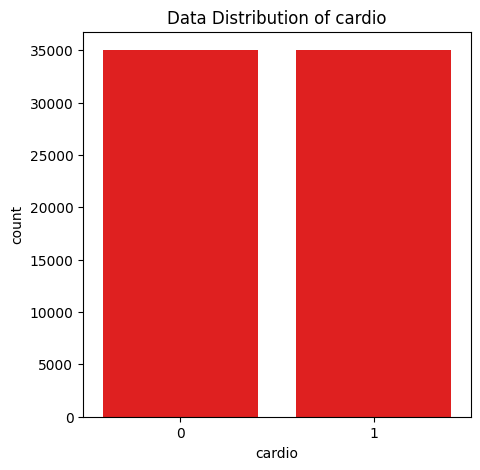

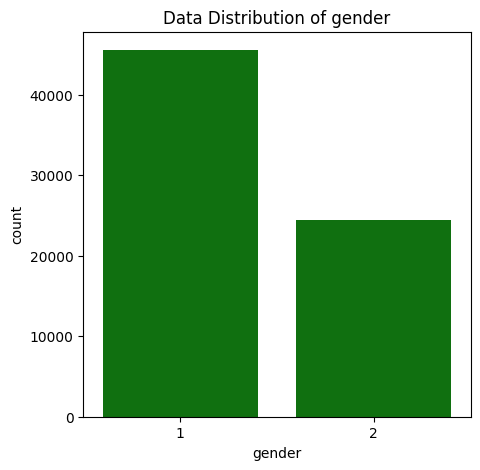

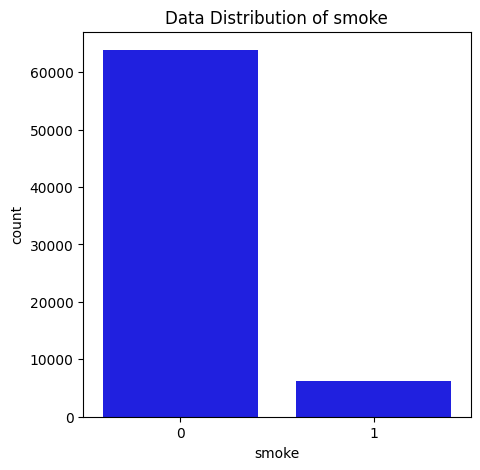

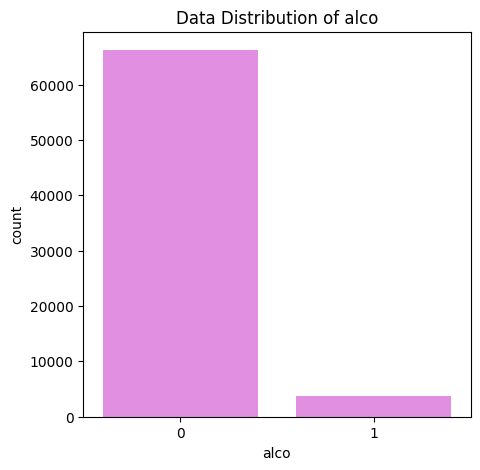

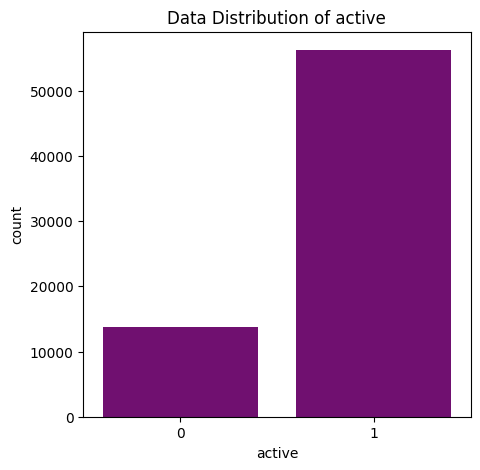

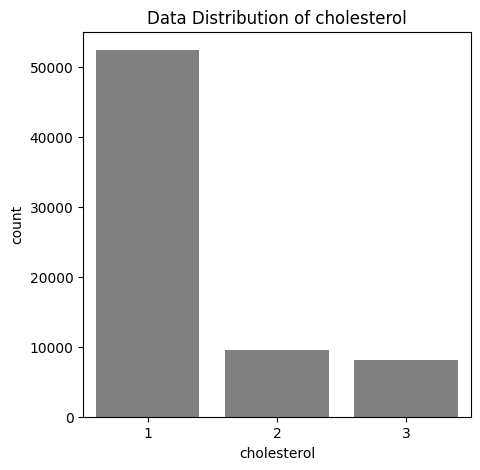

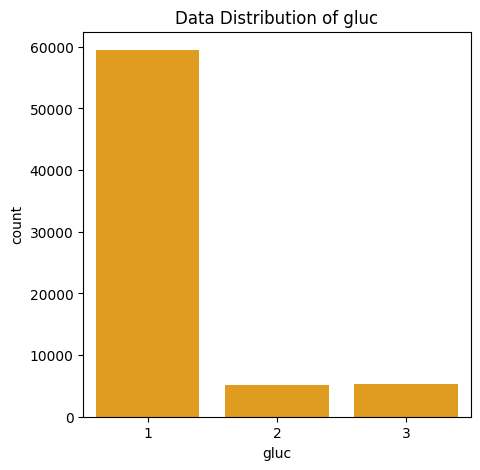

In [18]:
# color and column lists
color_list=["red", "green", "blue","violet","purple","grey","orange"]
col_list=["cardio", "gender", "smoke","alco","active", "cholesterol","gluc"]

# Loop through the column list and create count plots
for i in range(len(col_list)):
    plt.figure(figsize=(5,5))
    sns.countplot(data=df, x=df[col_list[i]], color=color_list[i])
    plt.title(f"Data Distribution of {col_list[i]}")
    plt.show()

Univariate analysis using histograms on numerical columns of dataset

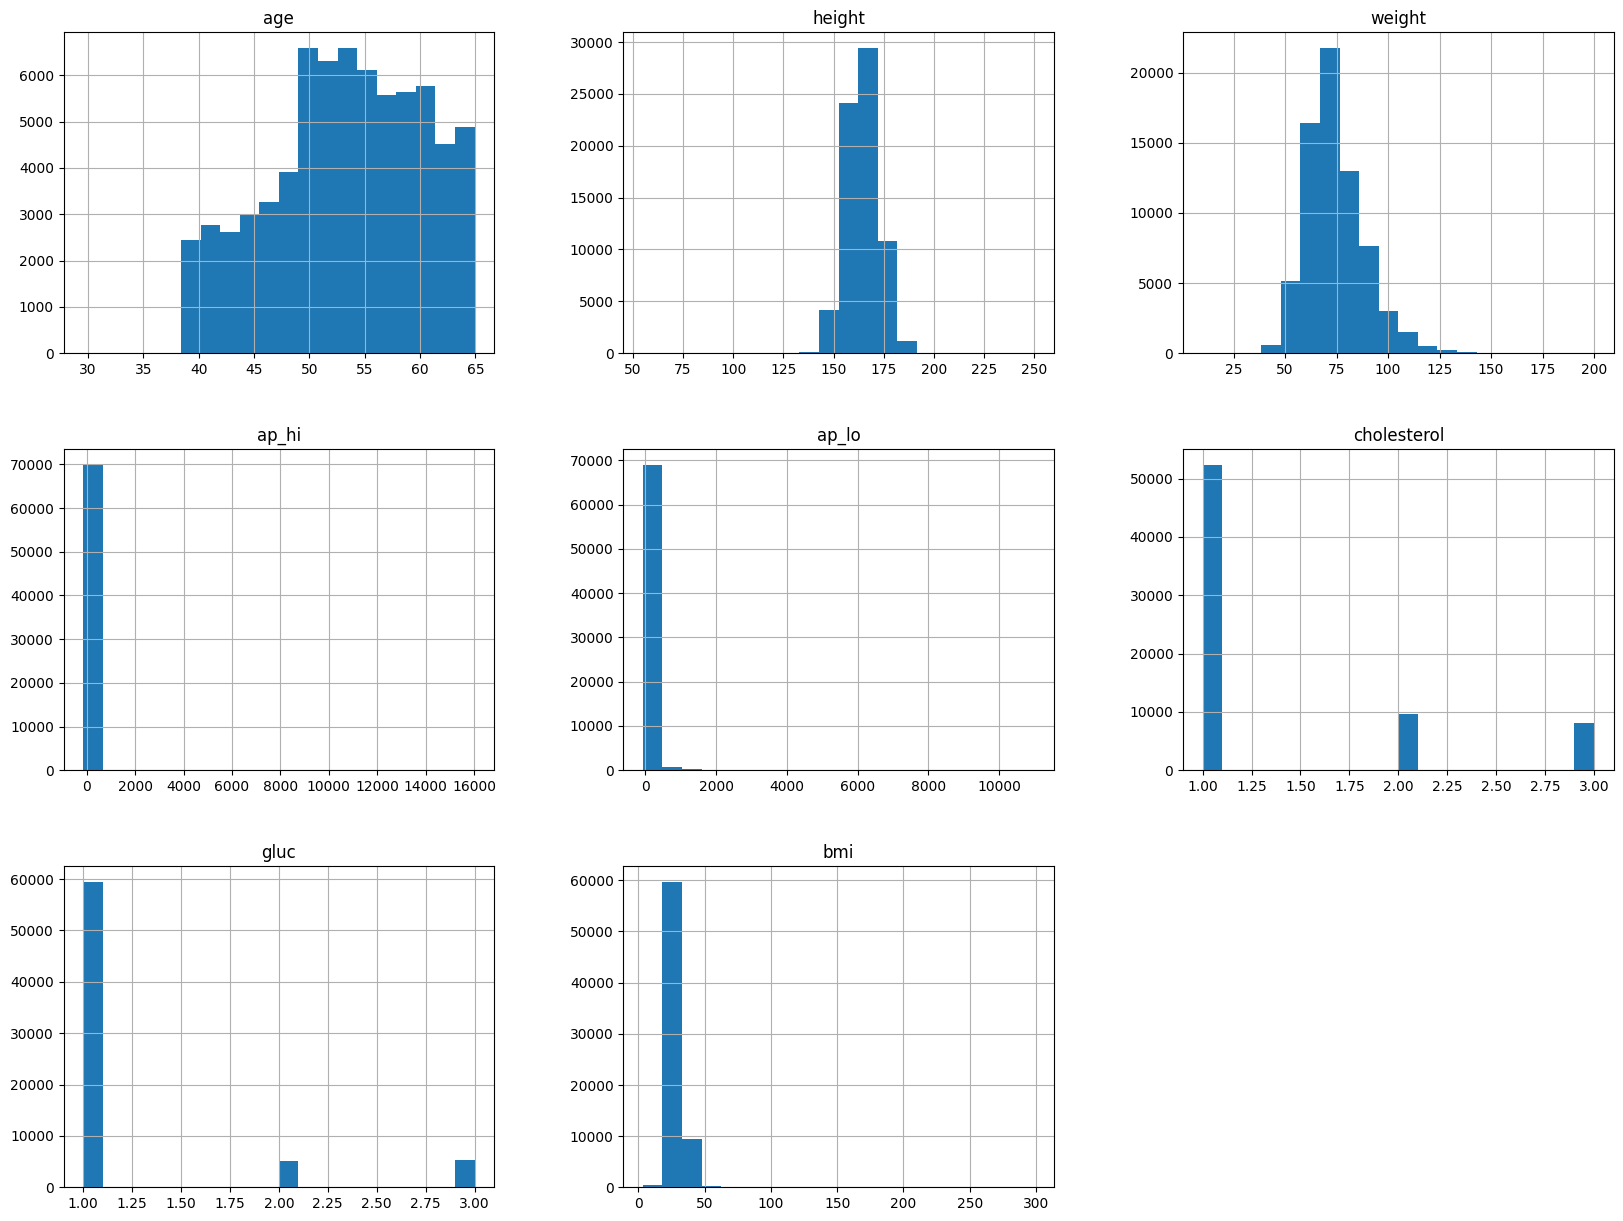

In [19]:
df.hist(bins=20, figsize=(20, 15))
plt.show()

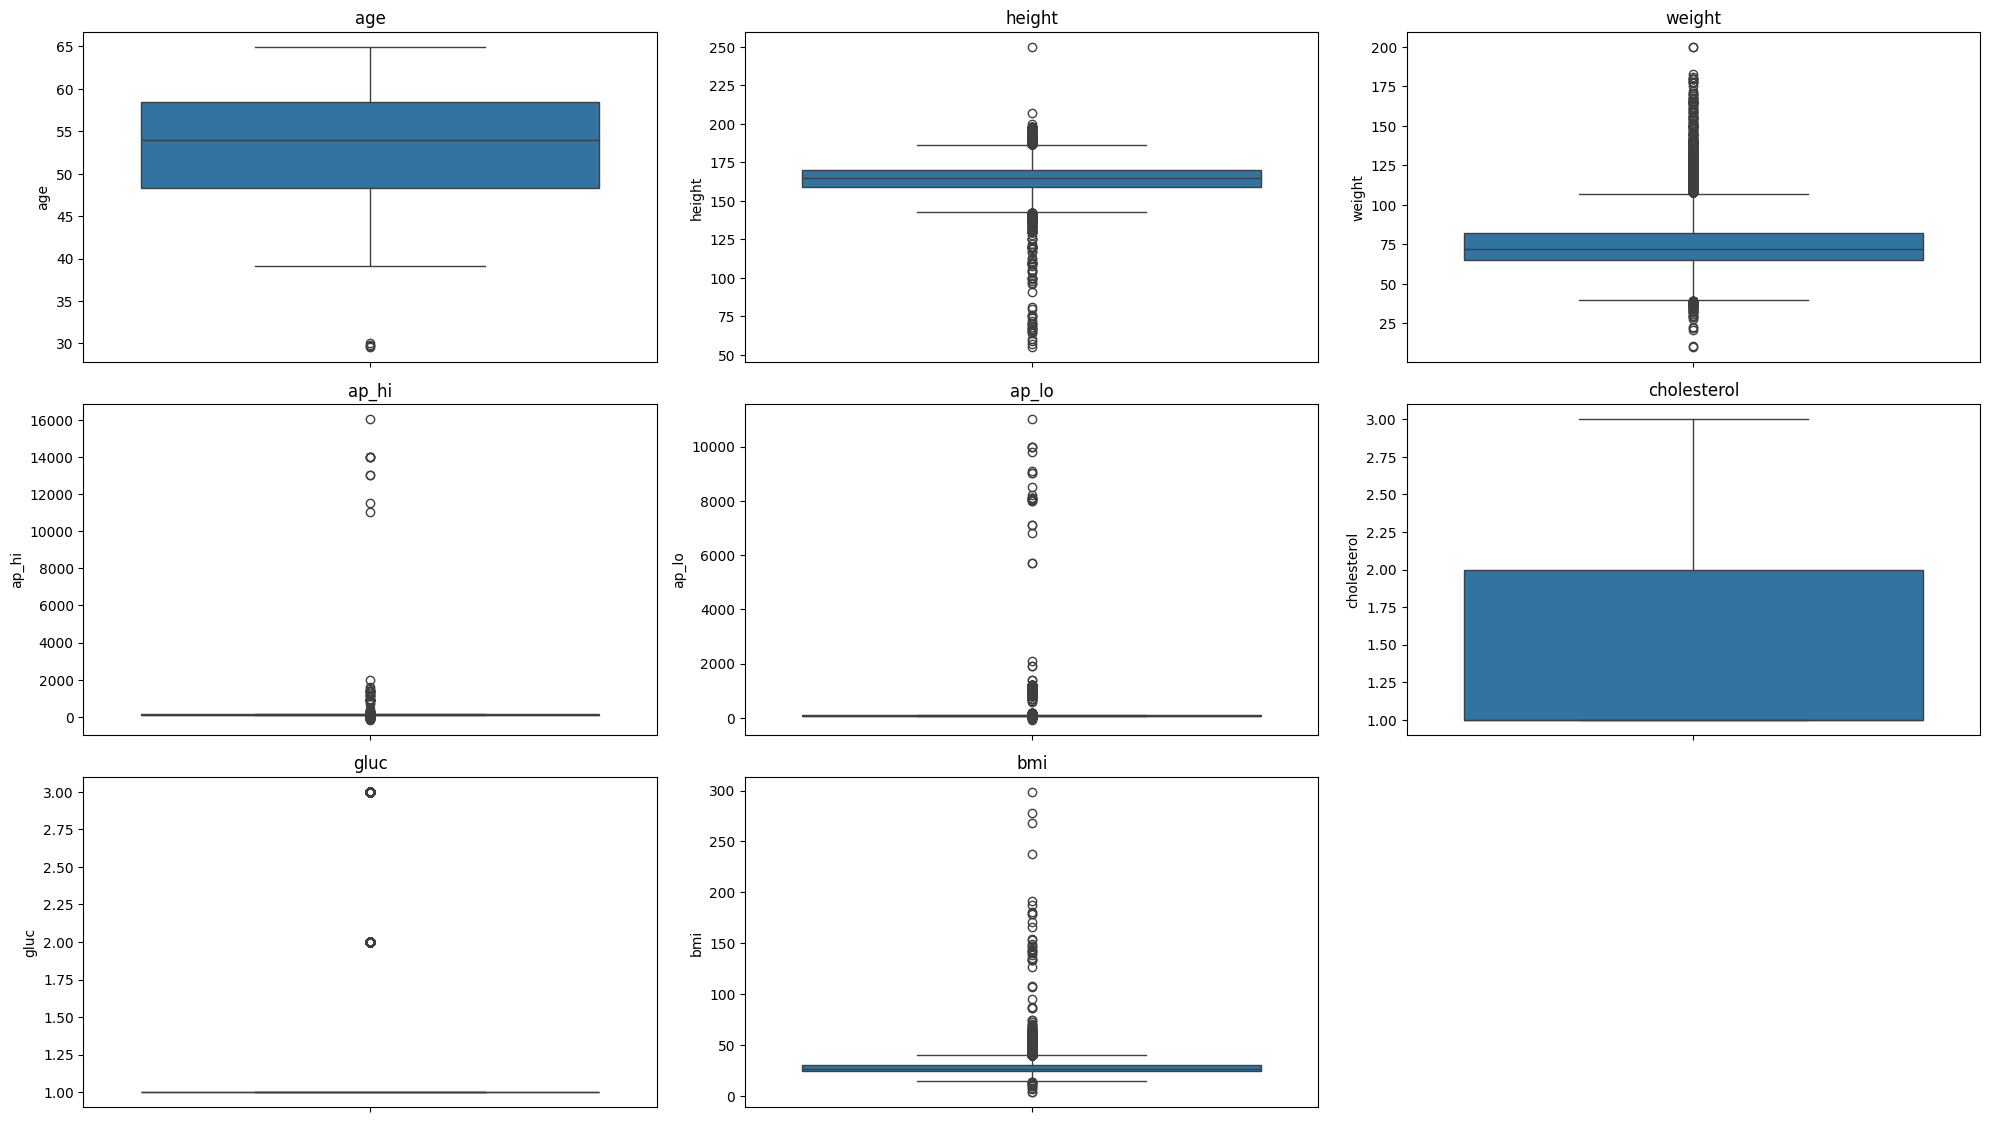

In [20]:
# Box plots for numerical columns
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.select_dtypes(include=['int64', 'float64']).columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

# Multivariate analysis

                  age    gender    height    weight     ap_hi     ap_lo  \
age          1.000000 -0.022811 -0.081515  0.053684  0.020764  0.017647   
gender      -0.022811  1.000000  0.499033  0.155406  0.006005  0.015254   
height      -0.081515  0.499033  1.000000  0.290968  0.005488  0.006150   
weight       0.053684  0.155406  0.290968  1.000000  0.030702  0.043710   
ap_hi        0.020764  0.006005  0.005488  0.030702  1.000000  0.016086   
ap_lo        0.017647  0.015254  0.006150  0.043710  0.016086  1.000000   
cholesterol  0.154424 -0.035821 -0.050226  0.141768  0.023778  0.024019   
gluc         0.098703 -0.020491 -0.018595  0.106857  0.011841  0.010806   
smoke       -0.047633  0.338135  0.187989  0.067780 -0.000922  0.005186   
alco        -0.029723  0.170966  0.094419  0.067113  0.001408  0.010601   
active      -0.009927  0.005866 -0.006570 -0.016867 -0.000033  0.004780   
cardio       0.238159  0.008109 -0.010821  0.181660  0.054475  0.065719   
bmi          0.085512 -0.

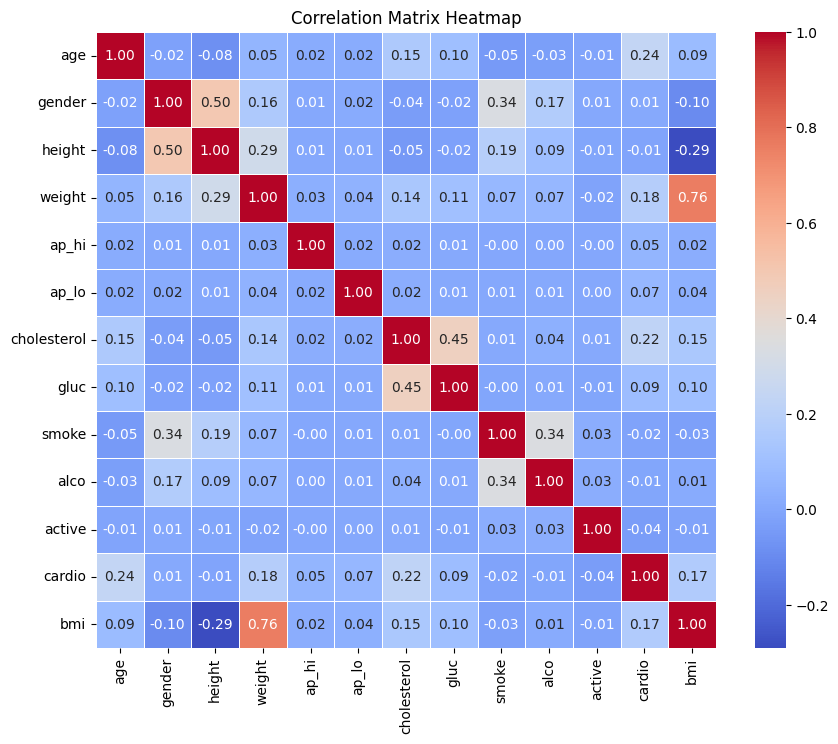

In [22]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Display the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

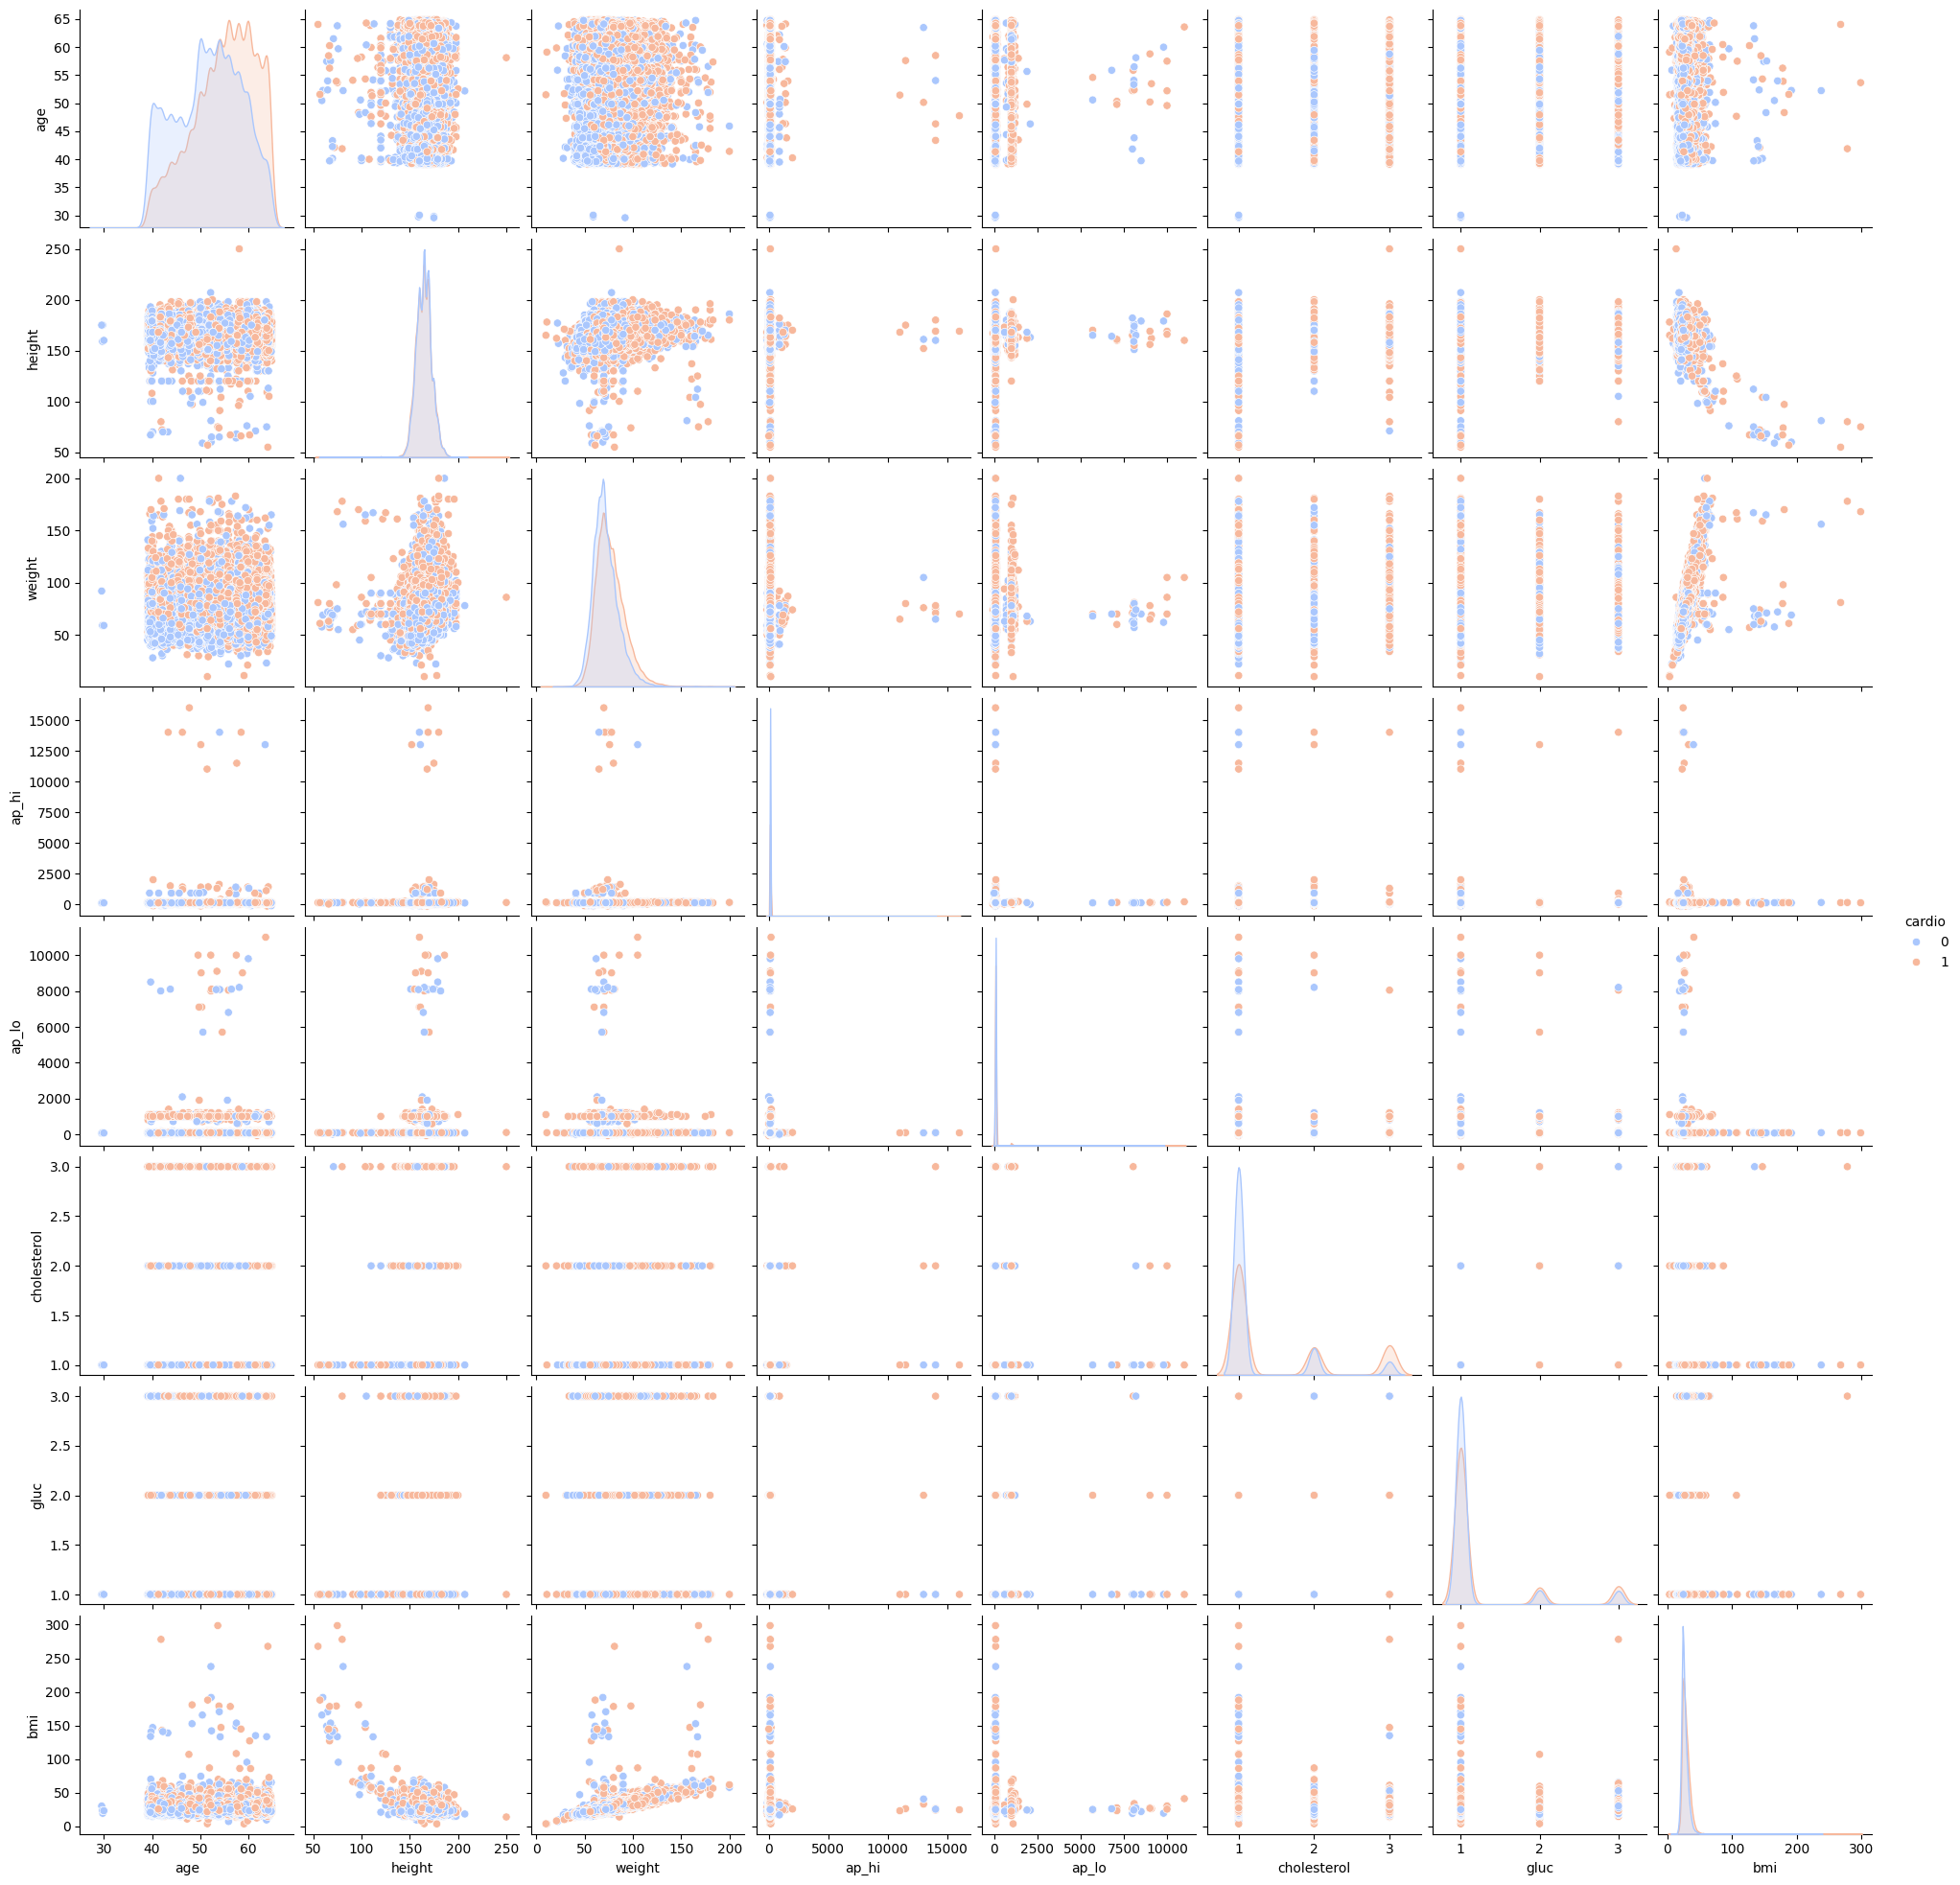

In [23]:
# a pairplot
sns.pairplot(df, hue='cardio', palette='coolwarm')
plt.show()

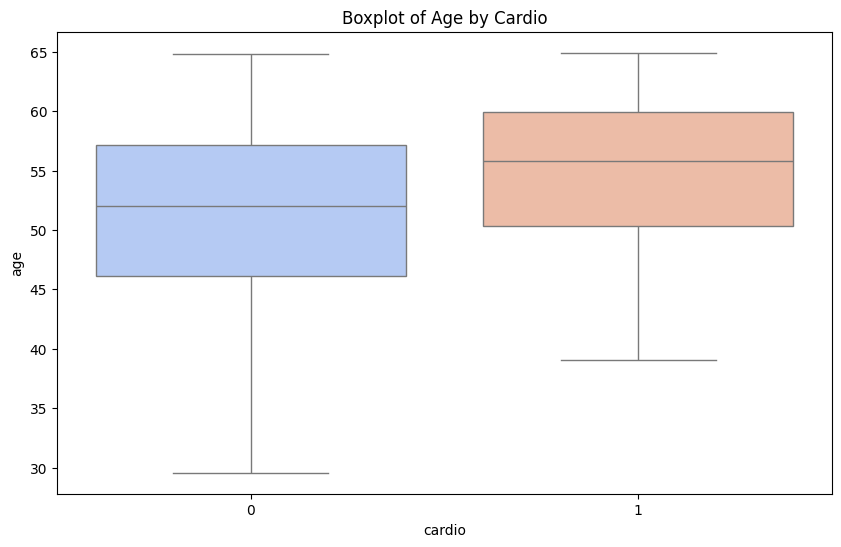

In [27]:
# Boxplot for Age vs Cardio
plt.figure(figsize=(10, 6))
sns.boxplot(x='cardio', y='age', data=df, hue='cardio', palette='coolwarm', legend=False)
plt.title('Boxplot of Age by Cardio')
plt.show()

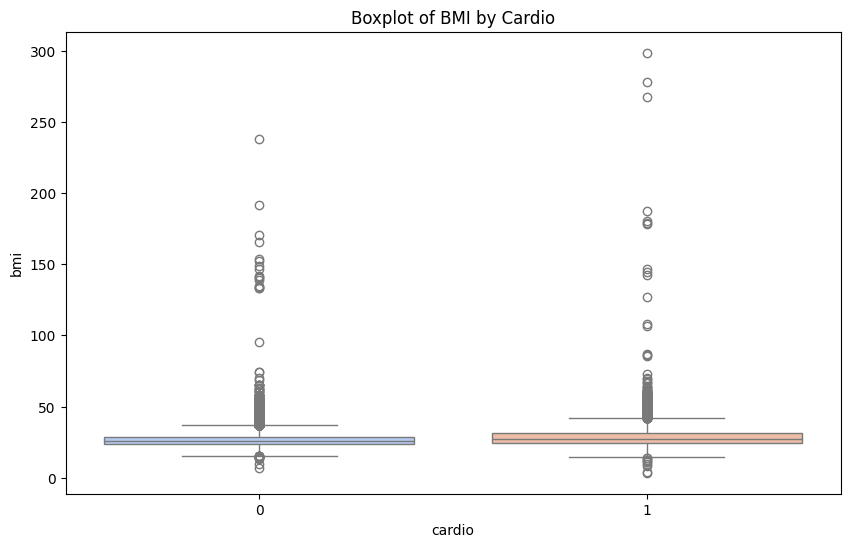

In [28]:
# Boxplot for BMI vs Cardio
plt.figure(figsize=(10, 6))
sns.boxplot(x='cardio', y='bmi', data=df, hue='cardio', palette='coolwarm', legend=False)
plt.title('Boxplot of BMI by Cardio')
plt.show()

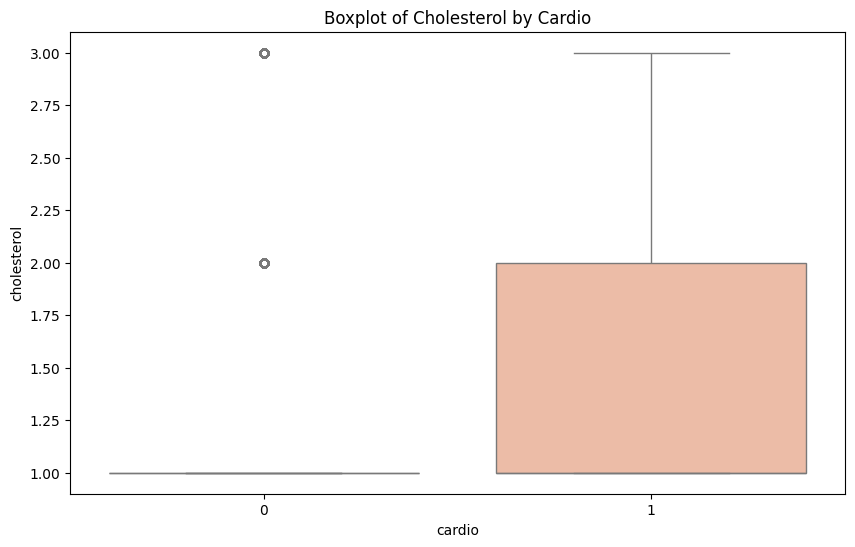

In [29]:
# Boxplot for Cholesterol vs Cardio
plt.figure(figsize=(10, 6))
sns.boxplot(x='cardio', y='cholesterol', data=df, hue='cardio', palette='coolwarm', legend=False)
plt.title('Boxplot of Cholesterol by Cardio')
plt.show()

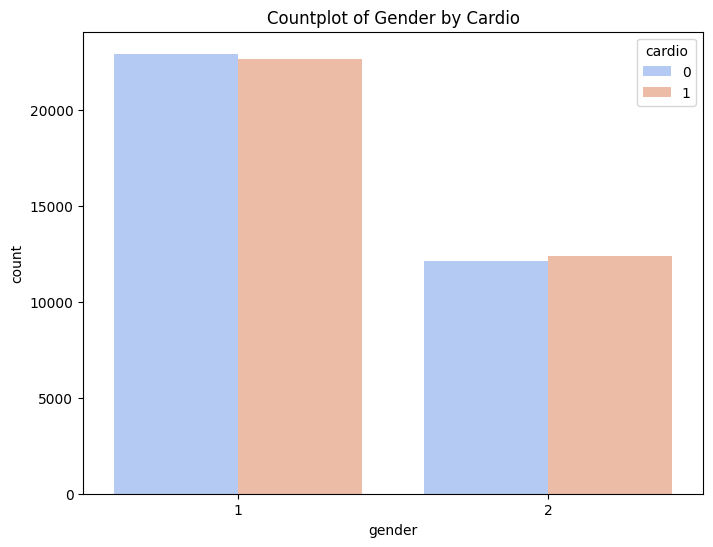

In [31]:
# Countplot for Gender vs Cardio
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='cardio', data=df, palette='coolwarm')
plt.title('Countplot of Gender by Cardio')
plt.show()


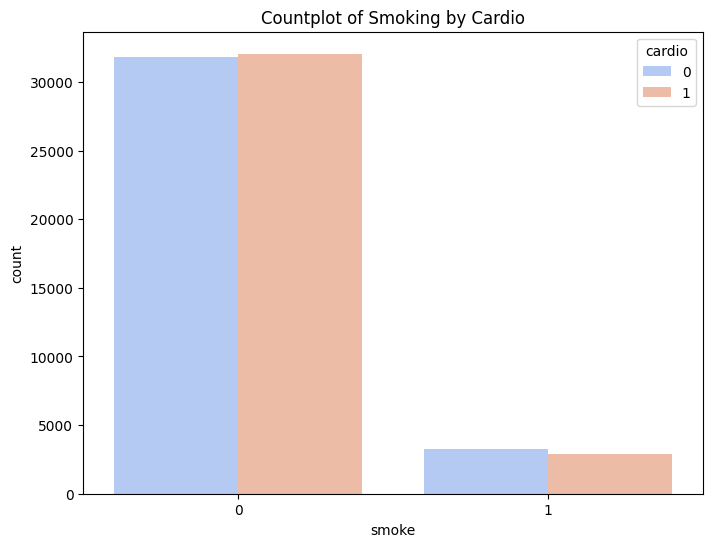

In [32]:
# Countplot for Smoke vs Cardio
plt.figure(figsize=(8, 6))
sns.countplot(x='smoke', hue='cardio', data=df, palette='coolwarm')
plt.title('Countplot of Smoking by Cardio')
plt.show()

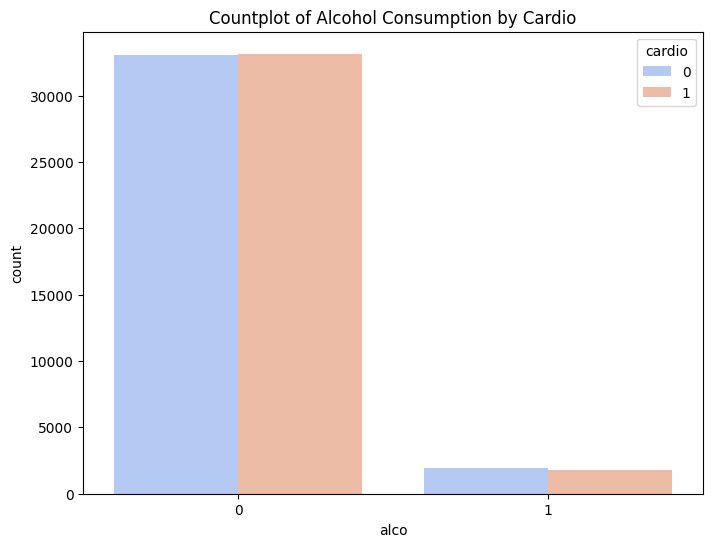

In [33]:
# Countplot for Alcohol vs Cardio
plt.figure(figsize=(8, 6))
sns.countplot(x='alco', hue='cardio', data=df, palette='coolwarm')
plt.title('Countplot of Alcohol Consumption by Cardio')
plt.show()

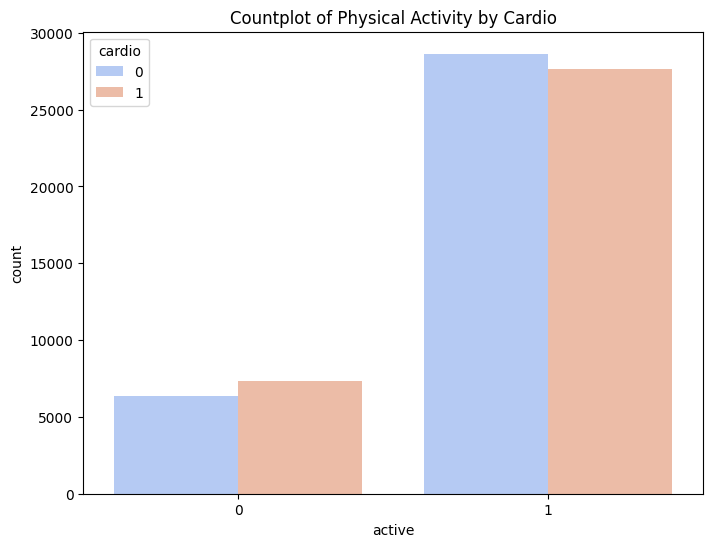

In [34]:
# Countplot for Physical Activity vs Cardio
plt.figure(figsize=(8, 6))
sns.countplot(x='active', hue='cardio', data=df, palette='coolwarm')
plt.title('Countplot of Physical Activity by Cardio')
plt.show()

# Correlation Matrix using Pearson Correlation Coefficient

Pearson Correlation Matrix:
                  age    gender    height    weight     ap_hi     ap_lo  \
age          1.000000 -0.022811 -0.081515  0.053684  0.020764  0.017647   
gender      -0.022811  1.000000  0.499033  0.155406  0.006005  0.015254   
height      -0.081515  0.499033  1.000000  0.290968  0.005488  0.006150   
weight       0.053684  0.155406  0.290968  1.000000  0.030702  0.043710   
ap_hi        0.020764  0.006005  0.005488  0.030702  1.000000  0.016086   
ap_lo        0.017647  0.015254  0.006150  0.043710  0.016086  1.000000   
cholesterol  0.154424 -0.035821 -0.050226  0.141768  0.023778  0.024019   
gluc         0.098703 -0.020491 -0.018595  0.106857  0.011841  0.010806   
smoke       -0.047633  0.338135  0.187989  0.067780 -0.000922  0.005186   
alco        -0.029723  0.170966  0.094419  0.067113  0.001408  0.010601   
active      -0.009927  0.005866 -0.006570 -0.016867 -0.000033  0.004780   
cardio       0.238159  0.008109 -0.010821  0.181660  0.054475  0.065719 

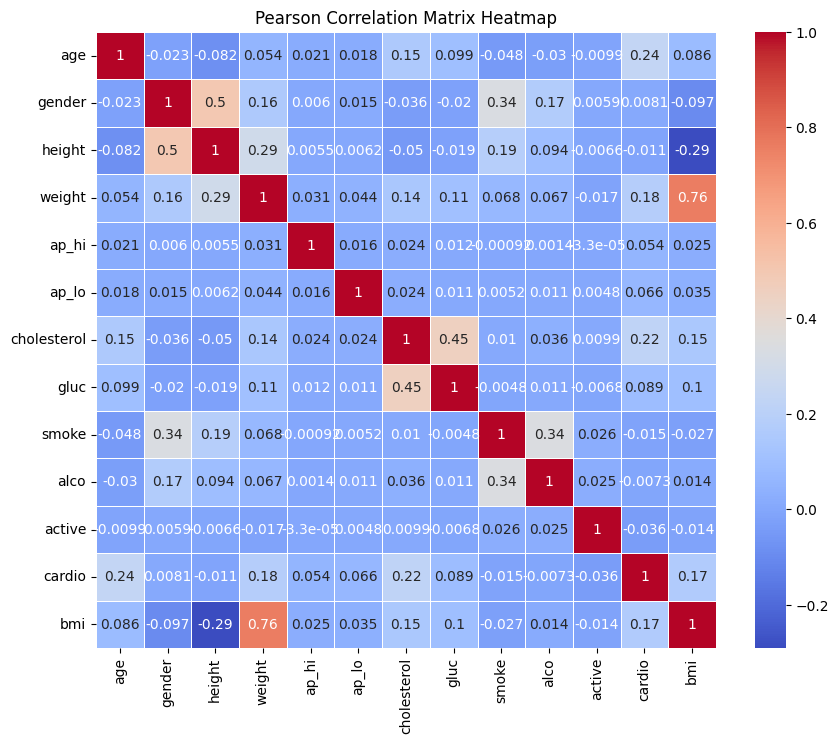

In [36]:
# Calculate Pearson correlation coefficient
corr_matrix_pearson = df.corr(method='pearson')

# Display correlation matrix
print("Pearson Correlation Matrix:")
print(corr_matrix_pearson)

# heatmap for Pearson correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_pearson, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Pearson Correlation Matrix Heatmap")
plt.show()

# Correlation Matrix using Kendall's tau Correlation Coefficient

Kendall's Tau Correlation Matrix:
                  age    gender    height    weight     ap_hi     ap_lo  \
age          1.000000 -0.016475 -0.056208  0.041645  0.160035  0.117831   
gender      -0.016475  1.000000  0.444649  0.142548  0.056158  0.060942   
height      -0.056208  0.444649  1.000000  0.225169  0.014985  0.023810   
weight       0.041645  0.142548  0.225169  1.000000  0.207721  0.195648   
ap_hi        0.160035  0.056158  0.014985  0.207721  1.000000  0.660933   
ap_lo        0.117831  0.060942  0.023810  0.195648  0.660933  1.000000   
cholesterol  0.111222 -0.034685 -0.047567  0.110616  0.178505  0.148526   
gluc         0.073533 -0.018524 -0.019894  0.089138  0.091512  0.074181   
smoke       -0.038764  0.338135  0.164624  0.059237  0.025716  0.024030   
alco        -0.024561  0.170966  0.080524  0.056272  0.029551  0.035681   
active      -0.008510  0.005866 -0.006136 -0.012310 -0.001127  0.003123   
cardio       0.191428  0.008109 -0.010315  0.150995  0.401699  0.3

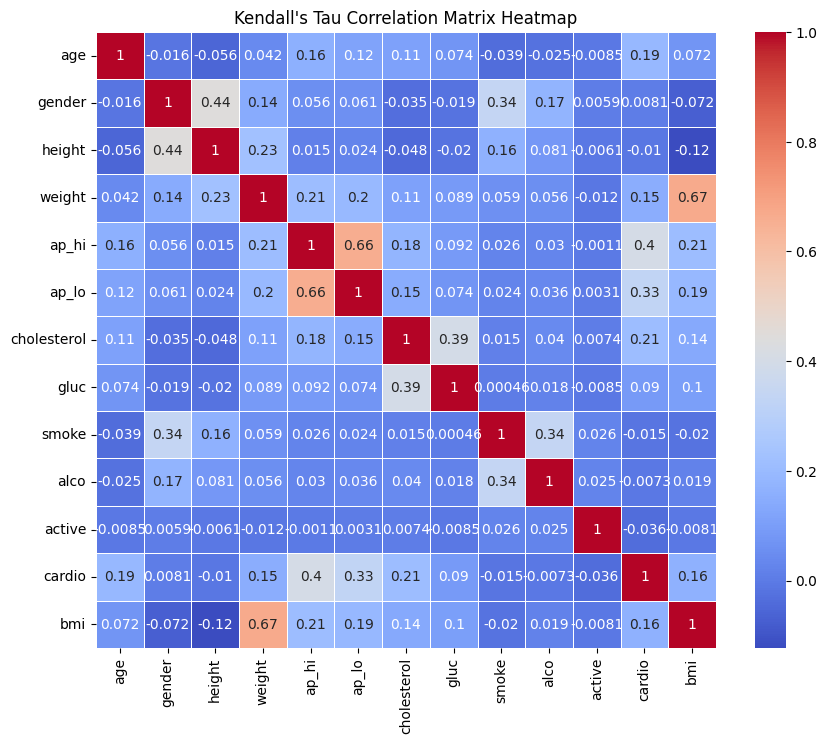

In [38]:
# Calculate Kendall's tau correlation coefficient
corr_matrix_kendall = df.corr(method='kendall')

# Display correlation matrix
print("Kendall's Tau Correlation Matrix:")
print(corr_matrix_kendall)

# heatmap for Kendall's tau correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_kendall, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Kendall's Tau Correlation Matrix Heatmap")
plt.show()

We can draw the following conclusions:
* Age: Both matrices show a weak positive correlation between age and systolic blood pressure (ap_hi) and diastolic blood pressure (ap_lo). This suggests that on average, blood pressure tends to increase with age.
* Gender: There appears to be a weak positive correlation between gender (coded as 0 or 1) and height.
* Weight: There's a strong positive correlation between weight and BMI.
* Smoking: There appears to be a weak positive correlation between smoking and both systolic and diastolic blood pressure. This suggests that smokers on average might have slightly higher blood pressure than non-smokers.
* Cardiovascular Disease: Both matrices show a positive correlation between cardio (cardiovascular disease) and age, weight, systolic blood pressure, and diastolic blood pressure. This suggests that people with these characteristics are more likely to have cardiovascular disease.
* Physical Activity: There are no strong correlations between physical activity and other variables.

# Distribution(skewness) of the columns

In [40]:
# Filter out numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate skewness for numerical columns
skewness = numerical_columns.skew()

# Display skewness values
print("Skewness of Numerical Columns:")
print(skewness)

Skewness of Numerical Columns:
age            -0.307055
height         -0.642187
weight          1.012070
ap_hi          85.296214
ap_lo          32.114083
cholesterol     1.587123
gluc            2.397462
bmi             7.728427
dtype: float64


* Age, Height, Weight: These distributions lean towards younger ages, shorter heights, and lower weights, with more individuals falling into these categories.
* Blood Pressure: Both systolic and diastolic blood pressure show a trend towards higher values, with a few individuals having very high readings.
* Cholesterol, Glucose, BMI: These all have a positive skew, indicating more individuals with higher values, particularly for glucose and BMI, where there might be a few outliers with very high readings.


# Outlier Detection (not removal)

In [41]:
# Z-Score method
from scipy.stats import zscore

# Calculate z-scores for numerical columns
z_scores = zscore(numerical_columns)

# Identify outliers using z-score threshold (e.g., z_score > 3 or z_score < -3)
outliers_zscore = numerical_columns[(z_scores > 3) | (z_scores < -3)]

# Display outliers
print("Outliers Detected using Z-Score Method:")
print(outliers_zscore)

Outliers Detected using Z-Score Method:
       age  height  weight  ap_hi  ap_lo  cholesterol  gluc        bmi
0      NaN     NaN     NaN    NaN    NaN          NaN   NaN        NaN
1      NaN     NaN     NaN    NaN    NaN          NaN   NaN        NaN
2      NaN     NaN     NaN    NaN    NaN          NaN   NaN        NaN
3      NaN     NaN     NaN    NaN    NaN          NaN   NaN        NaN
4      NaN     NaN     NaN    NaN    NaN          NaN   NaN        NaN
...    ...     ...     ...    ...    ...          ...   ...        ...
69995  NaN     NaN     NaN    NaN    NaN          NaN   NaN        NaN
69996  NaN     NaN   126.0    NaN    NaN          NaN   NaN  50.472681
69997  NaN     NaN     NaN    NaN    NaN          NaN   NaN        NaN
69998  NaN     NaN     NaN    NaN    NaN          NaN   NaN        NaN
69999  NaN     NaN     NaN    NaN    NaN          NaN   NaN        NaN

[70000 rows x 8 columns]


In [42]:
# Calculate the interquartile range (IQR) for numerical columns
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR method (e.g., values beyond Q1 - 1.5*IQR and Q3 + 1.5*IQR)
outliers_iqr = numerical_columns[((numerical_columns < (Q1 - 1.5 * IQR)) | (numerical_columns > (Q3 + 1.5 * IQR))).any(axis=1)]

# Display outliers
print("Outliers Detected using IQR Method:")
print(outliers_iqr)

Outliers Detected using IQR Method:
             age  height  weight  ap_hi  ap_lo  cholesterol  gluc        bmi
4      47.841205     156    56.0    100     60            1     1  23.011177
5      59.997262     151    67.0    120     80            2     2  29.384676
7      61.831622     178    95.0    130     90            3     3  29.983588
9      54.302533     164    68.0    110     60            1     1  25.282570
15     45.946612     172   112.0    120     80            1     1  37.858302
...          ...     ...     ...    ...    ...          ...   ...        ...
69985  49.812457     156   102.0    130     80            1     1  41.913215
69991  56.424367     159    72.0    130     90            2     2  28.479886
69996  61.878166     158   126.0    140     90            2     2  50.472681
69997  52.199863     183   105.0    180     90            3     1  31.353579
69998  61.412731     163    72.0    135     80            1     2  27.099251

[17146 rows x 8 columns]


# Class Imbalance detection

In [43]:
# Count the frequency of each class label
class_label_counts = df['cardio'].value_counts()

# Calculate the imbalance ratio
imbalance_ratio = class_label_counts[0] / class_label_counts[1]

# Display class label counts and imbalance ratio
print("Class Label Counts:")
print(class_label_counts)
print("\nImbalance Ratio (Class 0 : Class 1):", imbalance_ratio)


Class Label Counts:
cardio
0    35021
1    34979
Name: count, dtype: int64

Imbalance Ratio (Class 0 : Class 1): 1.0012007204322593


The imbalance ratio of 1.0012 is very close to 1, indicating an almost equal distribution between the two classes.